<a href="https://colab.research.google.com/github/Raghunandan1234/Face_mask_detection/blob/main/Face_mask_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = "raghunandan234" # username from the json file
os.environ['KAGGLE_KEY'] = "6cda51226f961ca311cd2c7478f84bcb" #

In [ ]:
!kaggle datasets download -d omkargurav/face-mask-dataset

face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
zip=zipfile.ZipFile('/content/face-mask-dataset.zip','r')
zip.extractall()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential,layers
import os
import matplotlib.pyplot as plt
import numpy
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files=os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])

['with_mask_1201.jpg', 'with_mask_2989.jpg', 'with_mask_2556.jpg', 'with_mask_3404.jpg', 'with_mask_630.jpg']


In [ ]:
without_mask_files=os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])

['without_mask_3363.jpg', 'without_mask_1906.jpg', 'without_mask_1848.jpg', 'without_mask_2232.jpg', 'without_mask_2047.jpg']


In [ ]:
with_mask_labels=[1]*len(with_mask_files)
without_mask_labels=[0]*len(without_mask_files)

In [ ]:
print(with_mask_labels)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [ ]:
labels=with_mask_labels+without_mask_labels

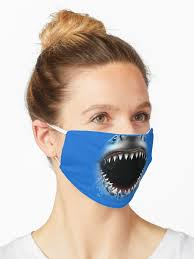

In [ ]:
img=cv2.imread('/content/data/with_mask/with_mask_2989.jpg')
cv2_imshow(img)

In [ ]:
import numpy as np
with_mask_path='/content/data/with_mask/'
data=[]
for imag_file in with_mask_files:
  image=Image.open(with_mask_path+imag_file)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
import numpy as np
with_mask_path='/content/data/without_mask/'

for imag_file in without_mask_files:
  image=Image.open(with_mask_path+imag_file)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)

In [ ]:
 X=np.array(data)
 Y=np.array(labels)

In [ ]:
X.shape

(7553, 128, 128, 3)

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
print(X.shape,X_train.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3)


In [ ]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [ ]:
num_of_classes=2
m=keras.Sequential()
m.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
m.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

m.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
m.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

m.add(keras.layers.Flatten())
m.add(keras.layers.Dense(128,activation='relu'))

m.add(keras.layers.Dropout(0.5))
m.add(keras.layers.Dense(64,activation='relu'))
m.add(keras.layers.Dropout(0.5))


m.add(keras.layers.Dense(2,activation='sigmoid'))



In [ ]:
m.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [ ]:
h=m.fit(X_train_scaled,Y_train,validation_split=0.1,epochs=5 )

Epoch 1/5
170/170 [==============================] - 5s 19ms/step - loss: 0.4487 - acc: 0.8030 - val_loss: 0.2667 - val_acc: 0.8826
Epoch 2/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2917 - acc: 0.8841 - val_loss: 0.2112 - val_acc: 0.8909
Epoch 3/5
170/170 [==============================] - 3s 18ms/step - loss: 0.2292 - acc: 0.9080 - val_loss: 0.2151 - val_acc: 0.9041
Epoch 4/5
170/170 [==============================] - 3s 17ms/step - loss: 0.1998 - acc: 0.9183 - val_loss: 0.1927 - val_acc: 0.9273
Epoch 5/5
170/170 [==============================] - 3s 16ms/step - loss: 0.1756 - acc: 0.9319 - val_loss: 0.1680 - val_acc: 0.9223


In [71]:
loss,accuracy=m.evaluate(X_test_scaled,Y_test)
print('Test accuracy=',accuracy)

48/48 [==============================] - 0s 8ms/step - loss: 0.1887 - acc: 0.9325
Test accuracy= 0.9324950575828552


Path/content/4.jpg


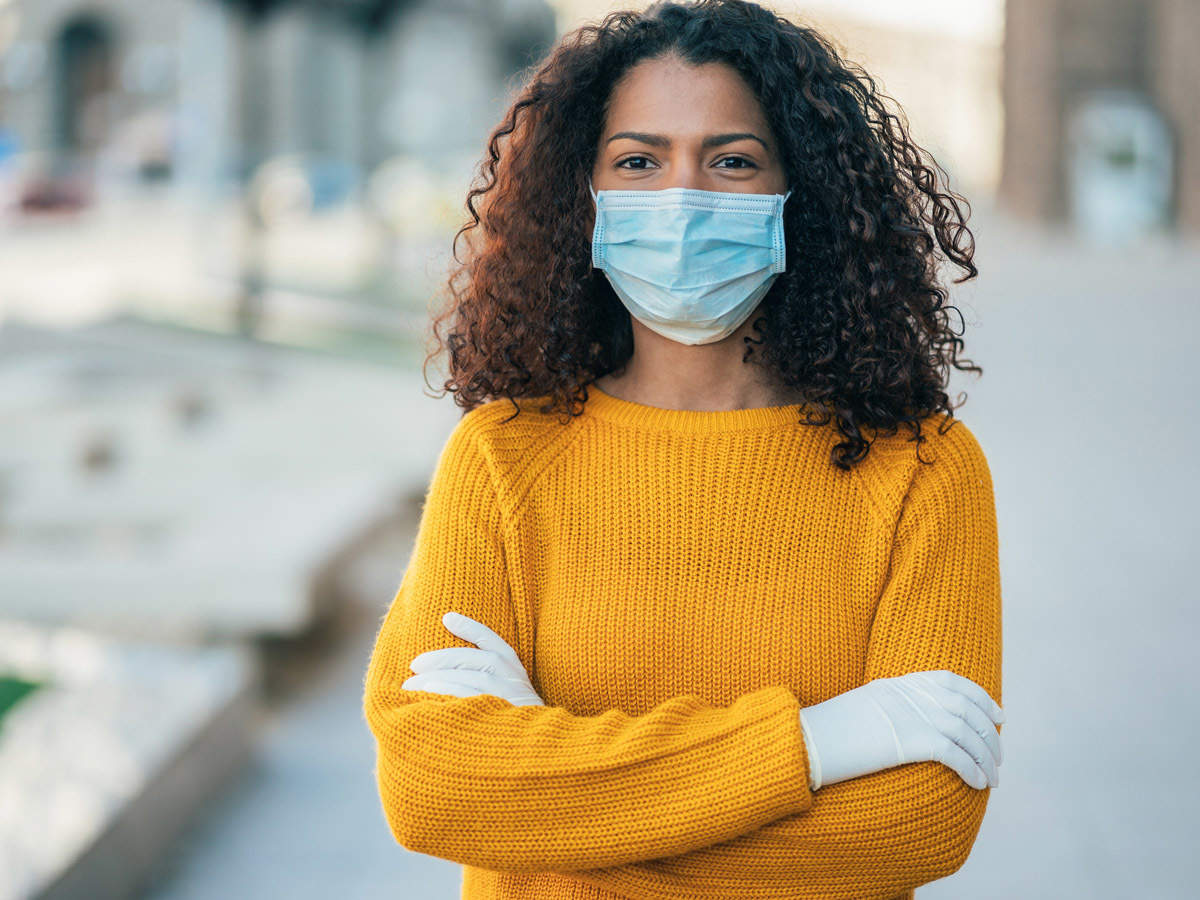

1/1 [==============================] - 0s 33ms/step
[[1.18866565e-05 9.99878645e-01]]
1
Mask


In [72]:
input_image_path=input('Path')
input_image=cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resized=cv2.resize(input_image,(128,128))
input_image_scaled=input_image_resized/255
input_image_reshaped=np.reshape(input_image_scaled,(1,128,128,3))
input_prediction=m.predict(input_image_reshaped)
print(input_prediction)
input_pred_label=np.argmax(input_prediction)
print(input_pred_label)
if(input_pred_label==1):
  print('Mask')
else:
  print('No mask')


